In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("/content/Fraud_check.csv")
df.info()
df.shape
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
df1=df.copy()
df1['Taxable_cat'] = pd.cut(x = df1['Taxable.Income'], bins = [10002,30000,99620], labels=['Risky','Good'], right = False)
df1["Taxable_cat"].value_counts()
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Taxable_cat
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


<Axes: >

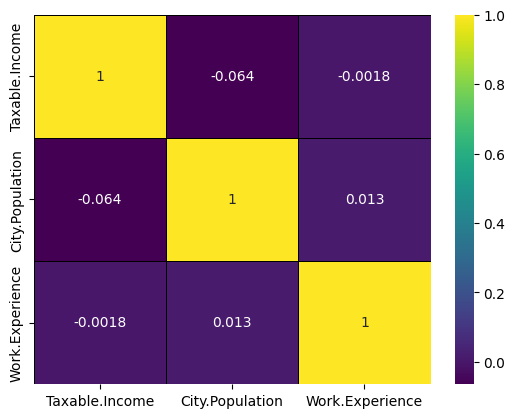

In [4]:
sns.heatmap(df.corr(), annot=True, fmt='.2g', cmap="viridis",  linewidths=0.5, linecolor='black')

<Axes: xlabel='Work.Experience'>

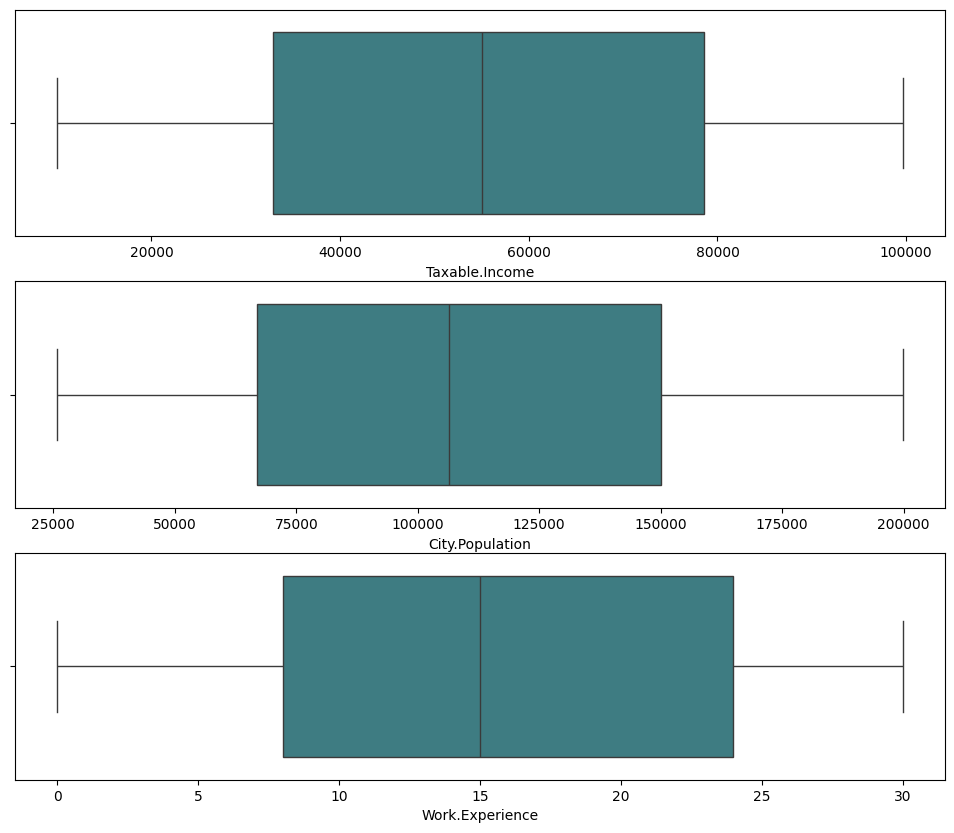

In [5]:
bp=df1.copy()
fig, axes=plt.subplots(3,1,figsize=(12,10),sharex=False,sharey=False)
sns.boxplot(x='Taxable.Income',data=bp,palette='crest',ax=axes[0])
sns.boxplot(x="City.Population",data=bp,palette='crest',ax=axes[1])
sns.boxplot(x='Work.Experience',data=bp,palette='crest',ax=axes[2])

<Figure size 800x800 with 0 Axes>

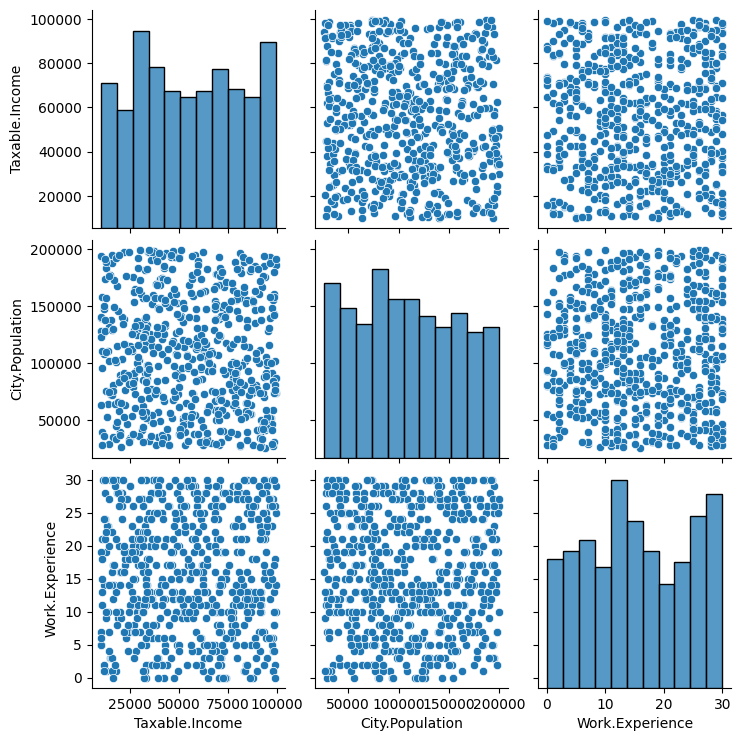

In [6]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='Set1')
plt.show()

Text(0.5, 1.0, 'Risky or Good for Individual Taxable Income ')

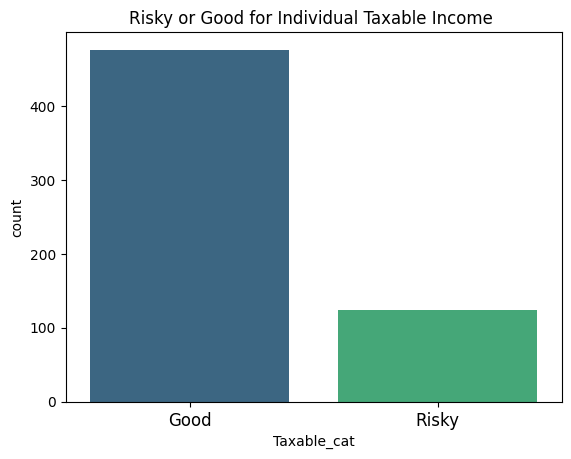

In [7]:
sns.countplot(x='Taxable_cat', data=df1, palette = 'viridis',
              order=df1['Taxable_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Risky or Good for Individual Taxable Income ')

Text(0.5, 1.0, 'Marital Status ')

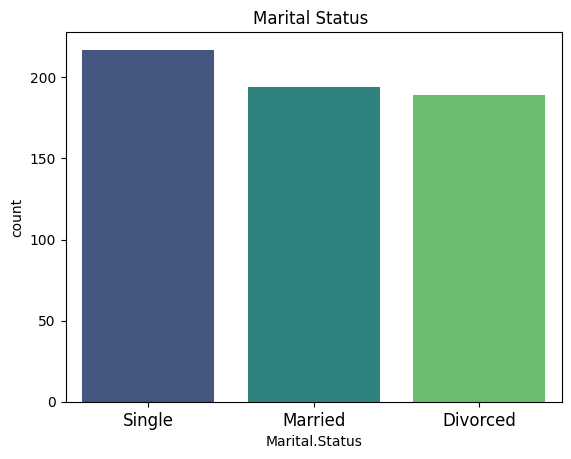

In [8]:
sns.countplot(x='Marital.Status', data=df1, palette = 'viridis',
              order=df1['Marital.Status'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Marital Status ')

Text(0.5, 1.0, 'Undergrad ')

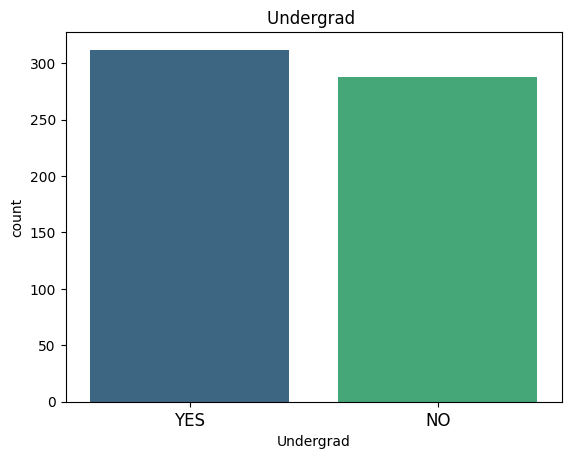

In [9]:
sns.countplot(x='Undergrad', data=df1, palette = 'viridis',
              order=df1['Undergrad'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Undergrad ')

Text(0.5, 1.0, 'Urban')

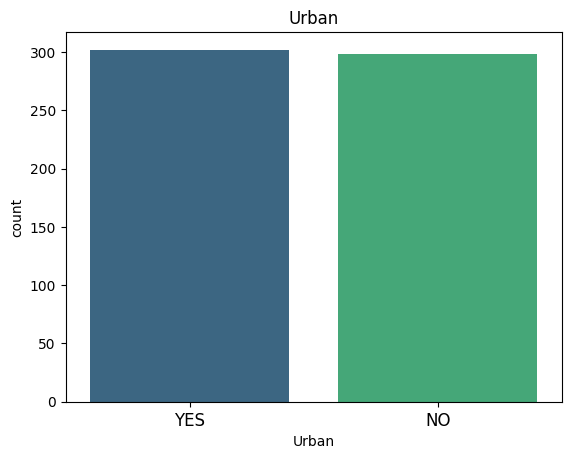

In [10]:

sns.countplot(x='Urban', data=df1, palette = 'viridis',
              order=df1['Urban'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Urban')

In [11]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

df1["Taxable_cat"]=LE.fit_transform(df1["Taxable_cat"])
df1["Urban"]=LE.fit_transform(df1["Urban"])
df1["Undergrad"]=LE.fit_transform(df1["Undergrad"])
df1["Marital.Status"]=LE.fit_transform(df1["Marital.Status"])

df1.drop('Taxable.Income', axis=1,inplace=True)

df1.head()


,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable_cat
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


In [12]:
#Data Spliting
X=df1.iloc[:,0:5]
Y=df1[["Taxable_cat"]]



In [13]:
# data partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30)


from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth=4)

DT.fit(X_train,Y_train) # Bo + b1x1 + B2x2
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

print("Number of Nodes",DT.tree_.node_count)
print("Level of Depth",DT.tree_.max_depth)

0.817
0.756
Number of Nodes 27
Level of Depth 4


In [14]:
# validation set method --> validaton hold-off method
training_accuracy = []
test_accuracy = []

DT = DecisionTreeClassifier(max_depth=1)


for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))

import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))

Average trianing accuray 0.79
Average test accuray 0.79


In [15]:
 clf_report = pd.DataFrame(classification_report(Y_train,Y_pred_train, output_dict=True))
 print(clf_report)

                    0     1  accuracy   macro avg  weighted avg
precision    0.792857   0.0  0.792857    0.396429      0.628622
recall       1.000000   0.0  0.792857    0.500000      0.792857
f1-score     0.884462   0.0  0.792857    0.442231      0.701252
support    333.000000  87.0  0.792857  420.000000    420.000000


In [16]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, max_samples = 0.6, max_features=0.7,max_depth=5)
RF.fit(X_train,Y_train)

Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)
training_accuracy = accuracy_score(Y_train,Y_pred_train).round(3)
test_accuracy = accuracy_score(Y_test,Y_pred_test).round(3)

print(training_accuracy)
print(test_accuracy)

0.795
0.794


In [17]:
# validation set method --> validaton hold-off method
training_accuracy = []
test_accuracy = []

for i in range(1,101,1):
    X_train,X_test,Y_train,Y_test  = train_test_split(X,Y, test_size=0.30, random_state=i)
    RF.fit(X_train,Y_train)
    Y_pred_train = RF.predict(X_train)
    Y_pred_test = RF.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train).round(3))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test).round(3))


import numpy as np
print("Average trianing accuray",np.mean(training_accuracy).round(2))
print("Average test accuray",np.mean(test_accuracy).round(2))

Average trianing accuray 0.8
Average test accuray 0.79


In [18]:
 clf_report = pd.DataFrame(classification_report(Y_train,Y_pred_train, output_dict=True))
 print(clf_report)

                    0     1  accuracy   macro avg  weighted avg
precision    0.792857   0.0  0.792857    0.396429      0.628622
recall       1.000000   0.0  0.792857    0.500000      0.792857
f1-score     0.884462   0.0  0.792857    0.442231      0.701252
support    333.000000  87.0  0.792857  420.000000    420.000000


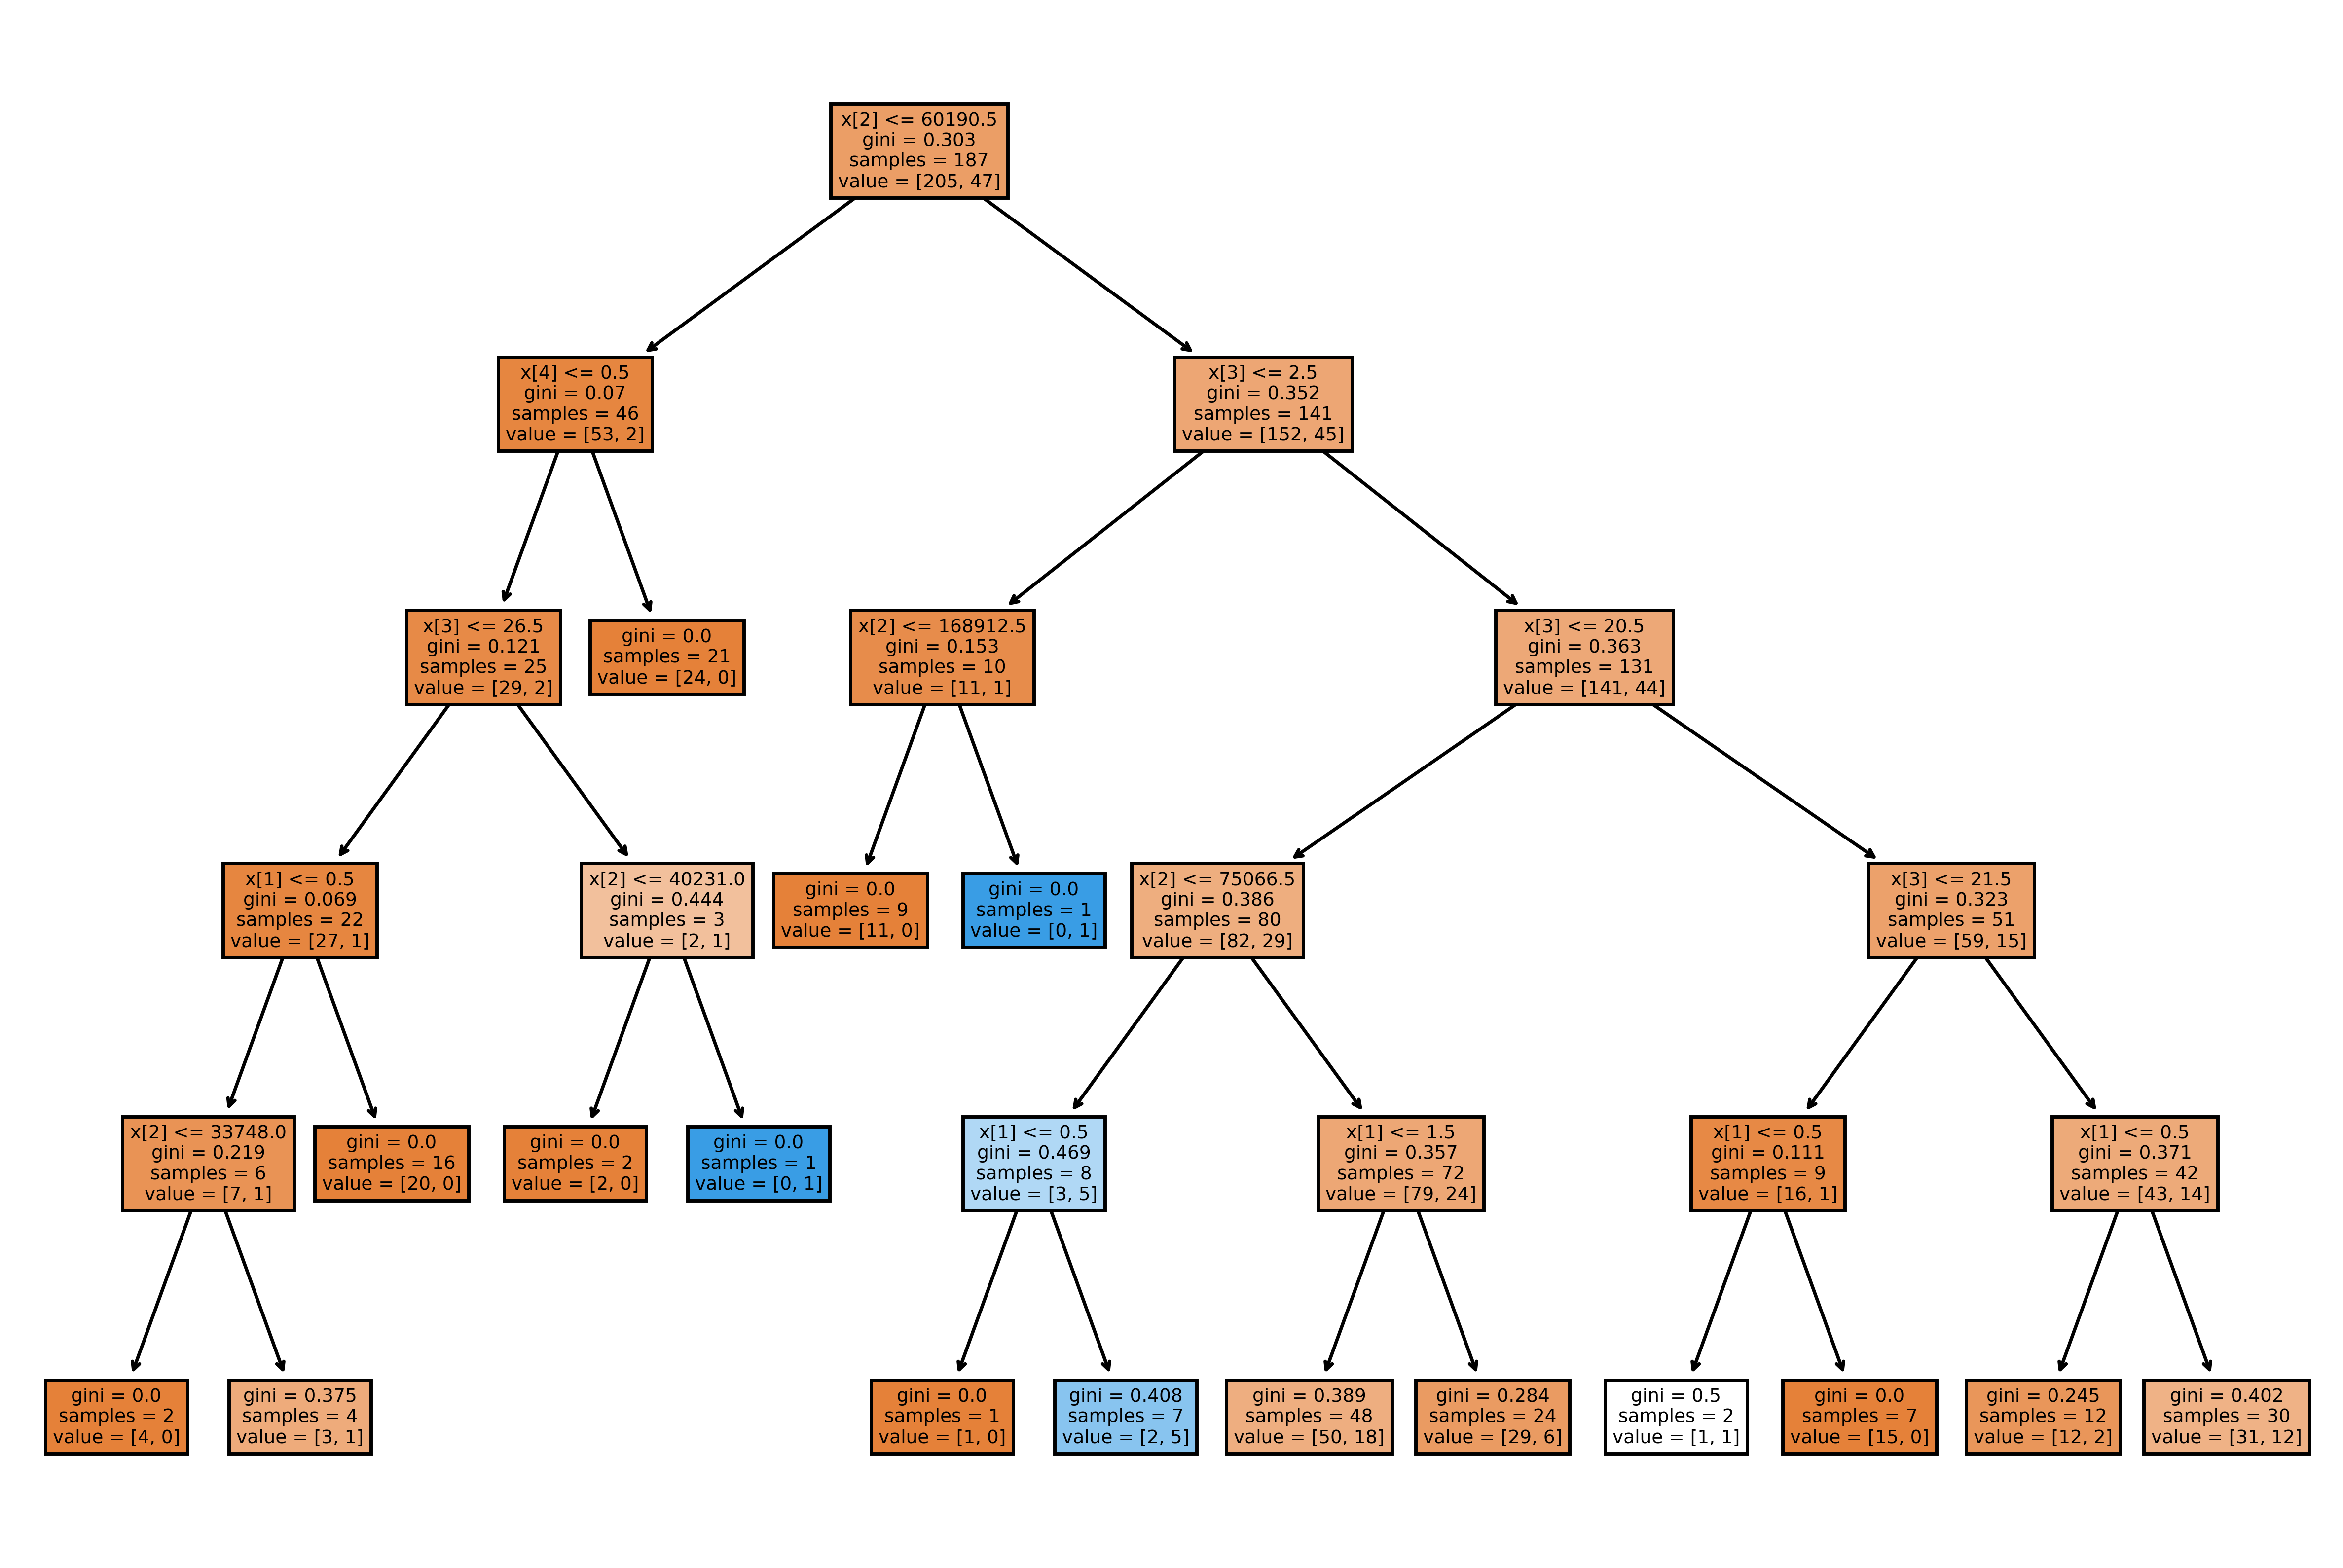

In [19]:
plt.figure(figsize=(12,8),dpi=500)
tree.plot_tree(RF.estimators_[190],filled=True)
plt.show()

In [20]:
RF.feature_importances_

array([0.04422759, 0.07666399, 0.53949114, 0.2881304 , 0.05148688])